<a href="https://colab.research.google.com/github/christine99x/MasterCourseProject/blob/main/SNA/sna_course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import csv
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.algorithms import community
from collections import Counter
import random
from random import  choice
from scipy.stats import spearmanr
import itertools

### Undirected Network

In [ ]:
# twitter
G = nx.Graph()
with open('out.ego-twitter', encoding='utf-8') as f:
  tsvreader = csv.reader(f)
  for line in tsvreader:
    line = re.split(' |\t', line[0])
    # print(line)
    G.add_edge(line[0], line[1])
  f.close()
m = G.number_of_edges()
n = G.number_of_nodes()
print("m =", m)
print("n =", n)
list_node = list(G.nodes)
set_node = set(list_node)

m = 32831
n = 23370


In [ ]:
# google plus
G = nx.Graph()
with open('out.ego-gplus', encoding='utf-8') as f:
  tsvreader = csv.reader(f)
  for line in tsvreader:
    line = re.split(' |\t', line[0])
    # print(line)
    G.add_edge(line[0], line[1])
  f.close()
m = G.number_of_edges()
n = G.number_of_nodes()
print("m =", m)
print("n =", n)
list_node = list(G.nodes)
set_node = set(list_node)

In [ ]:
# Adolescent health
G = nx.Graph()
with open('out.moreno_health_health', encoding='utf-8') as f:
  tsvreader = csv.reader(f)
  for line in tsvreader:
    line = re.split(' |\t', line[0])
    # print(line)
    G.add_edge(line[0], line[1])
  f.close()
m = G.number_of_edges()
n = G.number_of_nodes()
print("m =", m)
print("n =", n)
list_node = list(G.nodes)
set_node = set(list_node)

In [ ]:
# Wikitalk
G = nx.Graph()
with open('out.wiki_talk_eo', encoding='utf-8') as f:
  tsvreader = csv.reader(f)
  for line in tsvreader:
    line = re.split(' |\t', line[0])
    # print(line)
    G.add_edge(line[0], line[1])
  f.close()
m = G.number_of_edges()
n = G.number_of_nodes()
print("m =", m)
print("n =", n)
list_node = list(G.nodes)
set_node = set(list_node)

In [ ]:
max_i = 500
n_nodes = round(0.5*n)
"""Degree"""
d1 = sorted(nx.degree_centrality(G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
d1 = list(map(lambda x: x[0], d1))
#### 5% ####
# FNN
r1 = np.zeros((50,1))
for i in range(10):
    new_G = G.copy()
    del_num = round(0.05 * n)
    new_G.remove_nodes_from(random.sample(list(new_G.nodes), del_num))
    d2 = sorted(nx.degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
    d2 = list(map(lambda x: x[0], d2))
    for k in range(1,51):
      t = round(k*n/100)
      r1[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)

# FPN
r2 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.05 * n)
  for i in range(add_num):
    n_add = G.degree(choice(list_node))
    add_list = random.sample(list_node, n_add)
    for item in add_list:
      new_G.add_edge('sprious_nodes'+str(item), item)
  d2 = sorted(nx.degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r2[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


# FNE
r3 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  del_num = round(0.05 * m)
  new_G.remove_edges_from(random.sample(list(new_G.edges), del_num))
  d2 = sorted(nx.degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r3[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


# FPE
r4 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.05 * m)
  for i in range(add_num):
    x = random.choice(list_node)
    neighbor = list(set_node - set(G.neighbors(x)))
    y = random.choice(list_node)
    new_G.add_edge(x,y)
  d2 = sorted(nx.degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r4[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


#### 10% ####
# FNN
r5 = np.zeros((50,1))
for i in range(10):
    new_G = G.copy()
    del_num = round(0.1 * n)
    new_G.remove_nodes_from(random.sample(list(new_G.nodes), del_num))
    d2 = sorted(nx.degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
    d2 = list(map(lambda x: x[0], d2))
    for k in range(1,51):
      t = round(k*n/100)
      r5[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)

# FPN
r6 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.1 * n)
  for i in range(add_num):
    n_add = G.degree(choice(list_node))
    add_list = random.sample(list_node, n_add)
    for item in add_list:
      new_G.add_edge('sprious_nodes'+str(item), item)
  d2 = sorted(nx.degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r6[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


# FNE
r7 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  del_num = round(0.1 * m)
  new_G.remove_edges_from(random.sample(list(new_G.edges), del_num))
  d2 = sorted(nx.degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r7[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


# FPE
r8 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.1 * m)
  for i in range(add_num):
    x = random.choice(list_node)
    neighbor = list(set_node - set(G.neighbors(x)))
    y = random.choice(list_node)
    new_G.add_edge(x,y)
  d2 = sorted(nx.degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r8[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


#### 20% ####
# FNN
r9 = np.zeros((50,1))
for i in range(10):
    new_G = G.copy()
    del_num = round(0.2 * n)
    new_G.remove_nodes_from(random.sample(list(new_G.nodes), del_num))
    d2 = sorted(nx.degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
    d2 = list(map(lambda x: x[0], d2))
    for k in range(1,51):
      t = round(k*n/100)
      r9[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)

# FPN
r10 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.2 * n)
  for i in range(add_num):
    n_add = G.degree(choice(list_node))
    add_list = random.sample(list_node, n_add)
    for item in add_list:
      new_G.add_edge('sprious_nodes'+str(item), item)
  d2 = sorted(nx.degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r10[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


# FNE
r11 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  del_num = round(0.2 * m)
  new_G.remove_edges_from(random.sample(list(new_G.edges), del_num))
  d2 = sorted(nx.degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r11[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


# FPE
r12 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.2 * m)
  for i in range(add_num):
    x = random.choice(list_node)
    neighbor = list(set_node - set(G.neighbors(x)))
    y = random.choice(list_node)
    new_G.add_edge(x,y)
  d2 = sorted(nx.degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r12[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)



"""Eigen"""
d1 = sorted(nx.eigenvector_centrality(G, max_iter=250).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
d1 = list(map(lambda x: x[0], d1))
#### 5% ####
# FNN
r13 = np.zeros((50,1))
for i in range(10):
    new_G = G.copy()
    del_num = round(0.05 * n)
    new_G.remove_nodes_from(random.sample(list(new_G.nodes), del_num))
    d2 = sorted(nx.eigenvector_centrality(new_G, max_iter=max_i).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
    d2 = list(map(lambda x: x[0], d2))
    for k in range(1,51):
      t = round(k*n/100)
      r13[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)

# FPN
r14 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.05 * n)
  nodes_list = list(G.nodes)
  for i in range(add_num):
    n_add = G.degree(choice(nodes_list))
    add_list = random.sample(nodes_list, n_add)
    for item in add_list:
      new_G.add_edge('sprious_nodes'+str(item), item)
  d2 = sorted(nx.eigenvector_centrality(new_G, max_iter=max_i).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r14[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)

# FNE
r15 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  del_num = round(0.05 * m)
  new_G.remove_edges_from(random.sample(list(new_G.edges), del_num))
  d2 = sorted(nx.eigenvector_centrality(new_G, max_iter=max_i).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r15[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)

# FPE
r16 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.05 * m)
  for i in range(add_num):
    x = random.choice(list_node)
    neighbor = list(set_node - set(G.neighbors(x)))
    y = random.choice(list_node)
    new_G.add_edge(x,y)
  d2 = sorted(nx.eigenvector_centrality(new_G, max_iter=max_i).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r16[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


#### 10% ####
# FNN
r17 = np.zeros((50,1))
for i in range(10):
    new_G = G.copy()
    del_num = round(0.1 * n)
    new_G.remove_nodes_from(random.sample(list(new_G.nodes), del_num))
    d2 = sorted(nx.eigenvector_centrality(new_G, max_iter=max_i).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
    d2 = list(map(lambda x: x[0], d2))
    for k in range(1,51):
      t = round(k*n/100)
      r17[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)

# FPN
r18 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.1 * n)
  nodes_list = list(G.nodes)
  for i in range(add_num):
    n_add = G.degree(choice(nodes_list))
    add_list = random.sample(nodes_list, n_add)
    for item in add_list:
      new_G.add_edge('sprious_nodes'+str(item), item)
  d2 = sorted(nx.eigenvector_centrality(new_G, max_iter=max_i).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r18[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)

# FNE
r19 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  del_num = round(0.1 * m)
  new_G.remove_edges_from(random.sample(list(new_G.edges), del_num))
  d2 = sorted(nx.eigenvector_centrality(new_G, max_iter=max_i).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r19[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)

# FPE
r20 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.1 * m)
  for i in range(add_num):
    x = random.choice(list_node)
    neighbor = list(set_node - set(G.neighbors(x)))
    y = random.choice(list_node)
    new_G.add_edge(x,y)
  d2 = sorted(nx.eigenvector_centrality(new_G, max_iter=max_i).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r20[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)

#### 20% ####
# FNN
r21 = np.zeros((50,1))
for i in range(10):
    new_G = G.copy()
    del_num = round(0.2 * n)
    new_G.remove_nodes_from(random.sample(list(new_G.nodes), del_num))
    d2 = sorted(nx.eigenvector_centrality(new_G, max_iter=max_i).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
    d2 = list(map(lambda x: x[0], d2))
    for k in range(1,51):
      t = round(k*n/100)
      r21[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)

# FPN
r22 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.2 * n)
  nodes_list = list(G.nodes)
  for i in range(add_num):
    n_add = G.degree(choice(nodes_list))
    add_list = random.sample(nodes_list, n_add)
    for item in add_list:
      new_G.add_edge('sprious_nodes'+str(item), item)
  d2 = sorted(nx.eigenvector_centrality(new_G, max_iter=max_i).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r22[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)

# FNE
r23 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  del_num = round(0.2 * m)
  new_G.remove_edges_from(random.sample(list(new_G.edges), del_num))
  d2 = sorted(nx.eigenvector_centrality(new_G, max_iter=max_i).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r23[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)

# FPE
r24 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.2 * m)
  for i in range(add_num):
    x = random.choice(list_node)
    neighbor = list(set_node - set(G.neighbors(x)))
    y = random.choice(list_node)
    new_G.add_edge(x,y)
  d2 = sorted(nx.eigenvector_centrality(new_G, max_iter=max_i).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r24[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)

(0.45, 1.05)

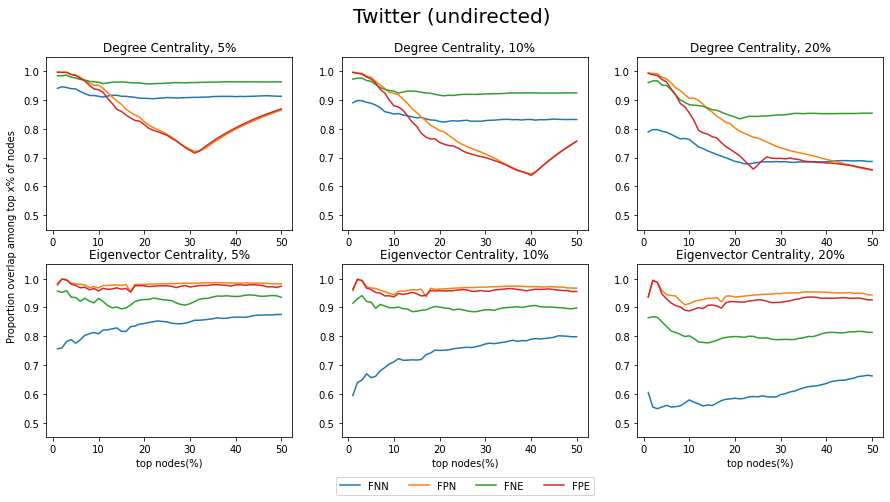

In [ ]:
"""plot"""
plt.figure(figsize=(15, 7))
plt.suptitle('Twitter (undirected)',fontsize=20)

plt.subplot(231)
plt.title("Degree Centrality, 5%")
# plt.xlabel("top nodes")
plt.plot(range(1,51), r1, label="FNN")
plt.plot(range(1,51), r2, label="FPN")
plt.plot(range(1,51), r3, label="FNE")
plt.plot(range(1,51), r4, label="FPE")
plt.gca().set_ylim(0.45, 1.05)
# plt.legend(loc='best')

plt.subplot(232)
plt.title("Degree Centrality, 10%")
# plt.xlabel("top nodes")
# plt.ylabel("spearman's rho")
plt.plot(range(1,51), r5, label="FNN")
plt.plot(range(1,51), r6, label="FPN")
plt.plot(range(1,51), r7, label="FNE")
plt.plot(range(1,51), r8, label="FPE")
# plt.legend(loc='best')
plt.gca().set_ylim(0.45, 1.05)

plt.subplot(233)
plt.title("Degree Centrality, 20%")
# plt.xlabel("top nodes")
# plt.ylabel("spearman's rho")
plt.plot(range(1,51), r9, label="FNN")
plt.plot(range(1,51), r10, label="FPN")
plt.plot(range(1,51), r11, label="FNE")
plt.plot(range(1,51), r12, label="FPE")
# plt.legend(loc='best')
plt.gca().set_ylim(0.45, 1.05)

plt.subplot(234)
plt.title("Eigenvector Centrality, 5%")
plt.xlabel("top nodes(%)")
plt.plot(range(1,51), r13, label="FNN")
plt.plot(range(1,51), r14, label="FPN")
plt.plot(range(1,51), r15, label="FNE")
plt.plot(range(1,51), r16, label="FPE")
# plt.legend(loc='best')
plt.gca().set_ylim(0.45, 1.05)
plt.text(-10, 1.15, 'Proportion overlap among top x% of nodes', va='center', rotation='vertical')

plt.subplot(235)
plt.title("Eigenvector Centrality, 10%")
plt.xlabel("top nodes(%)")
# plt.ylabel("spearman's rho")
plt.plot(range(1,51), r17, label="FNN")
plt.plot(range(1,51), r18, label="FPN")
plt.plot(range(1,51), r19, label="FNE")
plt.plot(range(1,51), r20, label="FPE")
# plt.legend(loc='best')
plt.gca().set_ylim(0.45, 1.05)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)

plt.subplot(236)
plt.title("Eigenvector Centrality, 20%")
plt.xlabel("top nodes(%)")
# plt.ylabel("spearman's rho")
plt.plot(range(1,51), r21, label="FNN")
plt.plot(range(1,51), r22, label="FPN")
plt.plot(range(1,51), r23, label="FNE")
plt.plot(range(1,51), r24, label="FPE")
# plt.legend(loc='best')
plt.gca().set_ylim(0.45, 1.05)

### Directed Network

In [ ]:
# twitter
G = nx.DiGraph()
with open('out.ego-twitter', encoding='utf-8') as f:
  tsvreader = csv.reader(f)
  for line in tsvreader:
    # print(line)
    line = re.split(' |\t', line[0])
    G.add_edge(line[0], line[1])
  f.close()
m = G.number_of_edges()
n = G.number_of_nodes()
print("m =", m)
print("n =", n)
list_node = list(G.nodes)
set_node = set(list_node)

In [ ]:
# google plus
G = nx.DiGraph()
with open('out.ego-gplus', encoding='utf-8') as f:
  tsvreader = csv.reader(f)
  for line in tsvreader:
    # print(line)
    line = re.split(' |\t', line[0])
    G.add_edge(line[0], line[1])
  f.close()
m = G.number_of_edges()
n = G.number_of_nodes()
print("m =", m)
print("n =", n)
list_node = list(G.nodes)
set_node = set(list_node)

In [ ]:
# Adolescent health
G = nx.DiGraph()
with open('out.moreno_health_health', encoding='utf-8') as f:
  tsvreader = csv.reader(f)
  for line in tsvreader:
    # print(line)
    line = re.split(' |\t', line[0])
    G.add_edge(line[0], line[1])
  f.close()
m = G.number_of_edges()
n = G.number_of_nodes()
print("m =", m)
print("n =", n)
list_node = list(G.nodes)
set_node = set(list_node)

In [ ]:
# Wikitalk
G = nx.DiGraph()
with open('out.wiki_talk_eo', encoding='utf-8') as f:
  tsvreader = csv.reader(f)
  for line in tsvreader:
    # print(line)
    line = re.split(' |\t', line[0])
    G.add_edge(line[0], line[1])
  f.close()
m = G.number_of_edges()
n = G.number_of_nodes()
print("m =", m)
print("n =", n)
list_node = list(G.nodes)
set_node = set(list_node)

In [ ]:
max_i = 800
n_nodes = round(0.5*n)
"""In Degree"""
d1 = sorted(nx.in_degree_centrality(G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
d1 = list(map(lambda x: x[0], d1))
#### 5% ####
# FNN
r1 = np.zeros((50,1))
for i in range(10):
    new_G = G.copy()
    del_num = round(0.05 * n)
    new_G.remove_nodes_from(random.sample(list(new_G.nodes), del_num))
    d2 = sorted(nx.in_degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
    d2 = list(map(lambda x: x[0], d2))
    for k in range(1,51):
      t = round(k*n/100)
      r1[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)

# FPN
r2 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.05 * n)
  for i in range(add_num):
    n_add = G.out_degree(choice(list_node))
    add_list = random.sample(list_node, n_add)
    for item in add_list:
      new_G.add_edge('sprious_nodes'+str(item), item)
    n_add = G.in_degree(choice(list_node))
    add_list = random.sample(list_node, n_add)
    for item in add_list:
      new_G.add_edge(item, 'sprious_nodes'+str(item))
  d2 = sorted(nx.in_degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r2[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


# FNE
r3 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  del_num = round(0.05 * m)
  new_G.remove_edges_from(random.sample(list(new_G.edges), del_num))
  d2 = sorted(nx.in_degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r3[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


# FPE
r4 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.05 * m)
  for i in range(add_num):
    x = random.choice(list_node)
    neighbor = list(set_node - set(G.neighbors(x)))
    y = random.choice(list_node)
    new_G.add_edge(x,y)
  d2 = sorted(nx.in_degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r4[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


#### 10% ####
# FNN
r5 = np.zeros((50,1))
for i in range(10):
    new_G = G.copy()
    del_num = round(0.1 * n)
    new_G.remove_nodes_from(random.sample(list(new_G.nodes), del_num))
    d2 = sorted(nx.in_degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
    d2 = list(map(lambda x: x[0], d2))
    for k in range(1,51):
      t = round(k*n/100)
      r5[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)

# FPN
r6 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.1 * n)
  for i in range(add_num):
    n_add = G.out_degree(choice(list_node))
    add_list = random.sample(list_node, n_add)
    for item in add_list:
      new_G.add_edge('sprious_nodes'+str(item), item)
    n_add = G.in_degree(choice(list_node))
    add_list = random.sample(list_node, n_add)
    for item in add_list:
      new_G.add_edge(item, 'sprious_nodes'+str(item))
  d2 = sorted(nx.in_degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r6[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


# FNE
r7 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  del_num = round(0.1 * m)
  new_G.remove_edges_from(random.sample(list(new_G.edges), del_num))
  d2 = sorted(nx.in_degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r7[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


# FPE
r8 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.1 * m)
  for i in range(add_num):
    x = random.choice(list_node)
    neighbor = list(set_node - set(G.neighbors(x)))
    y = random.choice(list_node)
    new_G.add_edge(x,y)
  d2 = sorted(nx.in_degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r8[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


#### 20% ####
# FNN
r9 = np.zeros((50,1))
for i in range(10):
    new_G = G.copy()
    del_num = round(0.2 * n)
    new_G.remove_nodes_from(random.sample(list(new_G.nodes), del_num))
    d2 = sorted(nx.in_degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
    d2 = list(map(lambda x: x[0], d2))
    for k in range(1,51):
      t = round(k*n/100)
      r9[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)

# FPN
r10 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.2 * n)
  for i in range(add_num):
    n_add = G.out_degree(choice(list_node))
    add_list = random.sample(list_node, n_add)
    for item in add_list:
      new_G.add_edge('sprious_nodes'+str(item), item)
    n_add = G.in_degree(choice(list_node))
    add_list = random.sample(list_node, n_add)
    for item in add_list:
      new_G.add_edge(item, 'sprious_nodes'+str(item))
  d2 = sorted(nx.in_degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r10[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


# FNE
r11 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  del_num = round(0.2 * m)
  new_G.remove_edges_from(random.sample(list(new_G.edges), del_num))
  d2 = sorted(nx.in_degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r11[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


# FPE
r12 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.2 * m)
  for i in range(add_num):
    x = random.choice(list_node)
    neighbor = list(set_node - set(G.neighbors(x)))
    y = random.choice(list_node)
    new_G.add_edge(x,y)
  d2 = sorted(nx.in_degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r12[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


"""Out Degree"""
d1 = sorted(nx.out_degree_centrality(G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
d1 = list(map(lambda x: x[0], d1))
#### 5% ####
# FNN
r13 = np.zeros((50,1))
for i in range(10):
    new_G = G.copy()
    del_num = round(0.05 * n)
    new_G.remove_nodes_from(random.sample(list(new_G.nodes), del_num))
    d2 = sorted(nx.out_degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
    d2 = list(map(lambda x: x[0], d2))
    for k in range(1,51):
      t = round(k*n/100)
      r13[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)

# FPN
r14 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.05 * n)
  for i in range(add_num):
    n_add = G.out_degree(choice(list_node))
    add_list = random.sample(list_node, n_add)
    for item in add_list:
      new_G.add_edge('sprious_nodes'+str(item), item)
    n_add = G.in_degree(choice(list_node))
    add_list = random.sample(list_node, n_add)
    for item in add_list:
      new_G.add_edge(item, 'sprious_nodes'+str(item))
  d2 = sorted(nx.out_degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r14[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


# FNE
r15 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  del_num = round(0.05 * m)
  new_G.remove_edges_from(random.sample(list(new_G.edges), del_num))
  d2 = sorted(nx.out_degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r15[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


# FPE
r16 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.05 * m)
  for i in range(add_num):
    x = random.choice(list_node)
    neighbor = list(set_node - set(G.neighbors(x)))
    y = random.choice(list_node)
    new_G.add_edge(x,y)
  d2 = sorted(nx.out_degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r16[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


#### 10% ####
# FNN
r17 = np.zeros((50,1))
for i in range(10):
    new_G = G.copy()
    del_num = round(0.1 * n)
    new_G.remove_nodes_from(random.sample(list(new_G.nodes), del_num))
    d2 = sorted(nx.out_degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
    d2 = list(map(lambda x: x[0], d2))
    for k in range(1,51):
      t = round(k*n/100)
      r17[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)

# FPN
r18 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.1 * n)
  for i in range(add_num):
    n_add = G.out_degree(choice(list_node))
    add_list = random.sample(list_node, n_add)
    for item in add_list:
      new_G.add_edge('sprious_nodes'+str(item), item)
    n_add = G.in_degree(choice(list_node))
    add_list = random.sample(list_node, n_add)
    for item in add_list:
      new_G.add_edge(item, 'sprious_nodes'+str(item))
  d2 = sorted(nx.out_degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r18[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


# FNE
r19 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  del_num = round(0.1 * m)
  new_G.remove_edges_from(random.sample(list(new_G.edges), del_num))
  d2 = sorted(nx.out_degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r19[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


# FPE
r20 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.1 * m)
  for i in range(add_num):
    x = random.choice(list_node)
    neighbor = list(set_node - set(G.neighbors(x)))
    y = random.choice(list_node)
    new_G.add_edge(x,y)
  d2 = sorted(nx.out_degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r20[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


#### 20% ####
# FNN
r21 = np.zeros((50,1))
for i in range(10):
    new_G = G.copy()
    del_num = round(0.2 * n)
    new_G.remove_nodes_from(random.sample(list(new_G.nodes), del_num))
    d2 = sorted(nx.out_degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
    d2 = list(map(lambda x: x[0], d2))
    for k in range(1,51):
      t = round(k*n/100)
      r21[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)

# FPN
r22 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.2 * n)
  for i in range(add_num):
    n_add = G.out_degree(choice(list_node))
    add_list = random.sample(list_node, n_add)
    for item in add_list:
      new_G.add_edge('sprious_nodes'+str(item), item)
    n_add = G.in_degree(choice(list_node))
    add_list = random.sample(list_node, n_add)
    for item in add_list:
      new_G.add_edge(item, 'sprious_nodes'+str(item))
  d2 = sorted(nx.out_degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r22[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


# FNE
r23 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  del_num = round(0.2 * m)
  new_G.remove_edges_from(random.sample(list(new_G.edges), del_num))
  d2 = sorted(nx.out_degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r23[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


# FPE
r24 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.2 * m)
  for i in range(add_num):
    x = random.choice(list_node)
    neighbor = list(set_node - set(G.neighbors(x)))
    y = random.choice(list_node)
    new_G.add_edge(x,y)
  d2 = sorted(nx.out_degree_centrality(new_G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r24[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


"""Eigen"""
d1 = sorted(nx.eigenvector_centrality(G).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
d1 = list(map(lambda x: x[0], d1))
#### 5% ####
# FNN
r25 = np.zeros((50,1))
for i in range(10):
    new_G = G.copy()
    del_num = round(0.05 * n)
    new_G.remove_nodes_from(random.sample(list(new_G.nodes), del_num))
    d2 = sorted(nx.eigenvector_centrality(new_G, max_iter=max_i).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
    d2 = list(map(lambda x: x[0], d2))
    for k in range(1,51):
      t = round(k*n/100)
      r25[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)

# FPN
r26 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.05 * n)
  for i in range(add_num):
    n_add = G.out_degree(choice(list_node))
    add_list = random.sample(list_node, n_add)
    for item in add_list:
      new_G.add_edge('sprious_nodes'+str(item), item)
    n_add = G.in_degree(choice(list_node))
    add_list = random.sample(list_node, n_add)
    for item in add_list:
      new_G.add_edge(item, 'sprious_nodes'+str(item))
  d2 = sorted(nx.eigenvector_centrality(new_G, max_iter=max_i).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r26[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


# FNE
r27 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  del_num = round(0.05 * m)
  new_G.remove_edges_from(random.sample(list(new_G.edges), del_num))
  d2 = sorted(nx.eigenvector_centrality(new_G, max_iter=max_i).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r27[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


# FPE
r28 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.05 * m)
  for i in range(add_num):
    x = random.choice(list_node)
    neighbor = list(set_node - set(G.neighbors(x)))
    y = random.choice(list_node)
    new_G.add_edge(x,y)
  d2 = sorted(nx.eigenvector_centrality(new_G, max_iter=max_i).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r28[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


#### 10% ####
# FNN
r29 = np.zeros((50,1))
for i in range(10):
    new_G = G.copy()
    del_num = round(0.1 * n)
    new_G.remove_nodes_from(random.sample(list(new_G.nodes), del_num))
    d2 = sorted(nx.eigenvector_centrality(new_G, max_iter=max_i).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
    d2 = list(map(lambda x: x[0], d2))
    for k in range(1,51):
      t = round(k*n/100)
      r29[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)

# FPN
r30 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.1 * n)
  for i in range(add_num):
    n_add = G.out_degree(choice(list_node))
    add_list = random.sample(list_node, n_add)
    for item in add_list:
      new_G.add_edge('sprious_nodes'+str(item), item)
    n_add = G.in_degree(choice(list_node))
    add_list = random.sample(list_node, n_add)
    for item in add_list:
      new_G.add_edge(item, 'sprious_nodes'+str(item))
  d2 = sorted(nx.eigenvector_centrality(new_G, max_iter=max_i).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r30[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


# FNE
r31 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  del_num = round(0.1 * m)
  new_G.remove_edges_from(random.sample(list(new_G.edges), del_num))
  d2 = sorted(nx.eigenvector_centrality(new_G, max_iter=max_i).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r31[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


# FPE
r32 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.1 * m)
  for i in range(add_num):
    x = random.choice(list_node)
    neighbor = list(set_node - set(G.neighbors(x)))
    y = random.choice(list_node)
    new_G.add_edge(x,y)
  d2 = sorted(nx.eigenvector_centrality(new_G, max_iter=max_i).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r32[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


#### 20% ####
# FNN
r33 = np.zeros((50,1))
for i in range(10):
    new_G = G.copy()
    del_num = round(0.2 * n)
    new_G.remove_nodes_from(random.sample(list(new_G.nodes), del_num))
    d2 = sorted(nx.eigenvector_centrality(new_G, max_iter=max_i).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
    d2 = list(map(lambda x: x[0], d2))
    for k in range(1,51):
      t = round(k*n/100)
      r33[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)

# FPN
r34 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.2 * n)
  for i in range(add_num):
    n_add = G.out_degree(choice(list_node))
    add_list = random.sample(list_node, n_add)
    for item in add_list:
      new_G.add_edge('sprious_nodes'+str(item), item)
    n_add = G.in_degree(choice(list_node))
    add_list = random.sample(list_node, n_add)
    for item in add_list:
      new_G.add_edge(item, 'sprious_nodes'+str(item))
  d2 = sorted(nx.eigenvector_centrality(new_G, max_iter=max_i).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r34[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


# FNE
r35 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  del_num = round(0.2 * m)
  new_G.remove_edges_from(random.sample(list(new_G.edges), del_num))
  d2 = sorted(nx.eigenvector_centrality(new_G, max_iter=max_i).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r35[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)


# FPE
r36 = np.zeros((50,1))
for i in range(10):
  new_G = G.copy()
  add_num = round(0.2 * m)
  for i in range(add_num):
    x = random.choice(list_node)
    neighbor = list(set_node - set(G.neighbors(x)))
    y = random.choice(list_node)
    new_G.add_edge(x,y)
  d2 = sorted(nx.eigenvector_centrality(new_G, max_iter=max_i).items(), key=lambda x:x[1], reverse=True)[:n_nodes]
  d2 = list(map(lambda x: x[0], d2))
  for k in range(1,51):
    t = round(k*n/100)
    r36[k-1] += len(set(d1[:t])&set(d2[:t]))/(10*t)

In [ ]:
"""plot"""
plt.figure(figsize=(15, 10))
plt.suptitle('Adolescent health (directed)',fontsize=20)

plt.subplot(331)
plt.title("In Degree Centrality, 5%")
plt.plot(range(1,51), r1, label="FNN")
plt.plot(range(1,51), r2, label="FPN")
plt.plot(range(1,51), r3, label="FNE")
plt.plot(range(1,51), r4, label="FPE")
plt.gca().set_ylim(0, 1.05)

plt.subplot(332)
plt.title("In Degree Centrality, 10%")
plt.plot(range(1,51), r5, label="FNN")
plt.plot(range(1,51), r6, label="FPN")
plt.plot(range(1,51), r7, label="FNE")
plt.plot(range(1,51), r8, label="FPE")
plt.gca().set_ylim(0, 1.05)

plt.subplot(333)
plt.title("In Degree Centrality, 20%")
plt.plot(range(1,51), r9, label="FNN")
plt.plot(range(1,51), r10, label="FPN")
plt.plot(range(1,51), r11, label="FNE")
plt.plot(range(1,51), r12, label="FPE")
plt.gca().set_ylim(0, 1.05)

plt.subplot(334)
plt.title("Out Degree Centrality, 5%")
plt.plot(range(1,51), r13, label="FNN")
plt.plot(range(1,51), r14, label="FPN")
plt.plot(range(1,51), r15, label="FNE")
plt.plot(range(1,51), r16, label="FPE")
plt.ylabel('Proportion overlap among top x% of nodes')
plt.gca().set_ylim(0, 1.05)

plt.subplot(335)
plt.title("Out Degree Centrality, 10%")
plt.plot(range(1,51), r17, label="FNN")
plt.plot(range(1,51), r18, label="FPN")
plt.plot(range(1,51), r19, label="FNE")
plt.plot(range(1,51), r20, label="FPE")
plt.gca().set_ylim(0, 1.05)

plt.subplot(336)
plt.title("Out Degree Centrality, 20%")
plt.plot(range(1,51), r21, label="FNN")
plt.plot(range(1,51), r22, label="FPN")
plt.plot(range(1,51), r23, label="FNE")
plt.plot(range(1,51), r24, label="FPE")
plt.gca().set_ylim(0, 1.05)

plt.subplot(337)
plt.title("Eigenvector Centrality, 5%")
plt.xlabel("top nodes(%)")
plt.plot(range(1,51), r25, label="FNN")
plt.plot(range(1,51), r26, label="FPN")
plt.plot(range(1,51), r27, label="FNE")
plt.plot(range(1,51), r28, label="FPE")
plt.gca().set_ylim(0, 1.05)

plt.subplot(338)
plt.title("Eigenvector Centrality, 10%")
plt.xlabel("top nodes(%)")
plt.plot(range(1,51), r29, label="FNN")
plt.plot(range(1,51), r30, label="FPN")
plt.plot(range(1,51), r31, label="FNE")
plt.plot(range(1,51), r32, label="FPE")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)
plt.gca().set_ylim(0, 1.05)

plt.subplot(339)
plt.title("Eigenvector Centrality, 20%")
plt.xlabel("top nodes(%)")
plt.plot(range(1,51), r33, label="FNN")
plt.plot(range(1,51), r34, label="FPN")
plt.plot(range(1,51), r35, label="FNE")
plt.plot(range(1,51), r36, label="FPE")
plt.gca().set_ylim(0, 1.05)